In [2]:
import matplotlib.pyplot as plt
import res_equa_diff as red
import numpy as np
import importlib
import power_spectrum as ps 

# Homogen univers

Declaring all constants

In [3]:
A0 = 0
MPC = 3.0856775813e22
OMEGA_M0 = 0.3
OMEGA_L0 = 0.7
OMEGA_R0 = 4.6e-5
OMEGA_K0 = 0
GYEAR = 24*60*60*365*1e9
H0 = 70e3/MPC*GYEAR
G = 6.67e-11*GYEAR**2*MPC**-3


We will need the second equation of Friedmann for calculate the scale factor $a$:

$$H = \frac{\dot{a}}{a} = H_0 \sqrt{\Omega_{R0}a^{-4} + \Omega_{m0}a^{-3} + \Omega_{k0}a^{-2}+ \Omega_{\Lambda 0}}$$

This differential equation can allow me to calculate the scale factor with the modern cosmology constants, but not all the model because of the square root.
For solving this, I drift through time:

$$\ddot{a} = H_0^2(\Omega_{\Lambda 0}a - \Omega_{m 0}a^{-2} - \Omega_{r 0}a^{-3})$$

No more square root here.

Function $\frac{da}{dt}$, $\frac{d^2 a}{dt^2}$

In [4]:
def a_p(a,OMEGA_R0=OMEGA_R0, OMEGA_M0=OMEGA_M0,OMEGA_L0=OMEGA_L0, OMEGA_K0=OMEGA_K0):

    return a*H0*np.sqrt(OMEGA_R0*a**-4 + OMEGA_M0*a**-3 + OMEGA_L0 + OMEGA_K0*a**-2)

def a_pp(a,OMEGA_R0=OMEGA_R0, OMEGA_M0=OMEGA_M0,OMEGA_L0=OMEGA_L0, OMEGA_K0=OMEGA_K0):

    return H0**2*(OMEGA_L0*a-OMEGA_M0/2*a**-2-OMEGA_R0*a**-3)



I solve second equation of Friedmann and test for different cosmology models

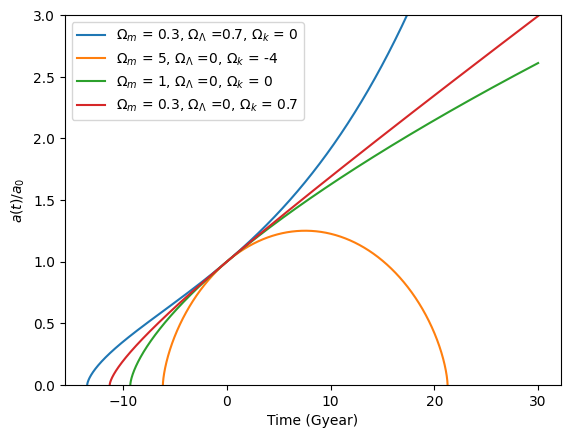

In [5]:
O_M0, O_L0, O_K0 = [0.3, 5, 1, 0.3], [0.7, 0, 0, 0], [0,-4,0,0.7]

for O_M, O_L, O_K in zip(O_M0, O_L0, O_K0):

    a_left,a_P,t_left = red.cosmo_model(-1e-3,a_pp,1,H0,0, 15, OMEGA_R0=OMEGA_R0, OMEGA_M0=O_M,OMEGA_L0=O_L, OMEGA_K0=O_K)
    a_right,a_P, t_right = red.cosmo_model(1e-3,a_pp,1,H0,0, 30, OMEGA_R0=OMEGA_R0, OMEGA_M0=O_M,OMEGA_L0=O_L, OMEGA_K0=O_K)

    a = np.concatenate([a_left[::-1], a_right],)
    t = np.concatenate([t_left[::-1], t_right],)

    plt.plot(np.array(t),a, label = r"$\Omega_{m}$ = " f"{O_M}" r", $\Omega_{\Lambda}$ =" f"{O_L}" r", $\Omega_{k}$ = "f"{O_K}")
plt.ylabel(r"$a(t)/a_0$")
plt.xlabel("Time (Gyear)")
plt.ylim(0,3)
plt.legend()
plt.show()


Resolution of differential equation by using first order differential equation + Calculate all cosmology constants 

In [6]:
importlib.reload(red)


DT =1e-3

a_left, a_P_left, T_left = red.euler_order_1(-DT,0, -13.5, a_p, 1)
a_right, a_P_right, T_right = red.euler_order_1(DT,0, 30, a_p, 1)

a = np.concatenate([a_left[::-1], a_right],)
a_P = np.concatenate([a_P_left[::-1], a_P_right],)
T = np.concatenate([T_left[::-1], T_right],)
H = a_P/a

rho_c = 3*H/(8*np.pi*G)

omega_m = OMEGA_M0*a**-3

omega_l = OMEGA_L0*np.ones(len(H))

omega_r = OMEGA_R0*a**-4

C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_11460\3486569566.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[1].set_xlim(0,2)


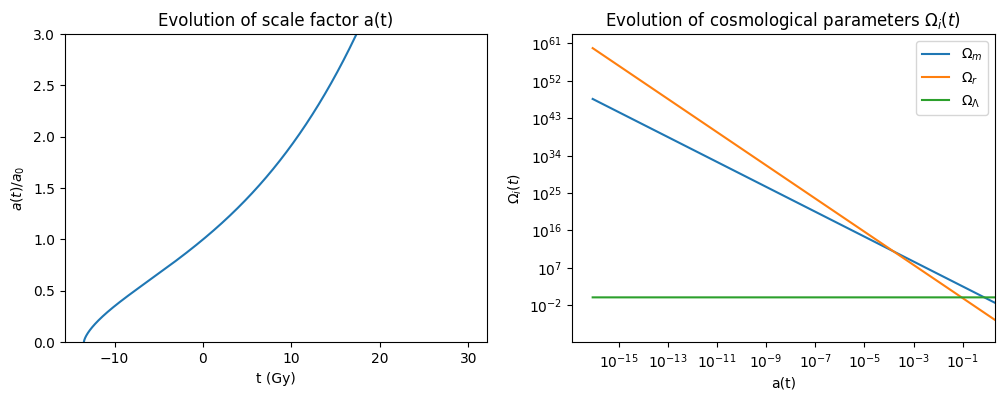

In [7]:
a_matter = np.where(np.diff(np.sign(omega_r-omega_m)))
a_dark_energy = np.where(np.diff(np.sign(omega_l-omega_m)))

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(T, a)
#ax[0].vlines(T[a_matter], np.min(omega_r), np.max(omega_r), color = "k", linestyle = "--")
#ax[0].vlines(T[a_dark_energy], np.min(omega_r), np.max(omega_r), color = "k", linestyle = "--")
ax[0].set_title("Evolution of scale factor a(t)")
ax[0].set_ylabel(r"$a(t)/a_0$")
ax[0].set_xlabel("t (Gy)")
ax[0].set_ylim(0,3)
ax[1].loglog(a, omega_m, label = r"$\Omega_m$")
ax[1].loglog(a, omega_r, label = r"$\Omega_r$")
ax[1].loglog(a, omega_l, label = r"$\Omega_\Lambda$")
#ax[1].vlines(a[a_matter], np.min(omega_r), np.max(omega_r), color = "k", linestyle = "--")
#ax[1].vlines(a[a_dark_energy], np.min(omega_r), np.max(omega_r), color = "k", linestyle = "--")
ax[1].set_title(r"Evolution of cosmological parameters $\Omega_i(t)$")
ax[1].set_ylabel(r"$\Omega_i(t)$")
ax[1].set_xlabel("a(t)")
ax[1].set_xlim(0,2)
ax[1].legend()
plt.show()

# Perturbations 


We resolve 4 equations :

$$\partial_t \delta_i + a^{-1}\theta_i = 0$$

$$\partial_t \theta_i + H\theta_i = -\frac{c_{s,i}^2}{a} \nabla^2\delta_i - a^{-1} \nabla^2\Phi $$

$$\nabla^2\Phi =  a^{2} 4\pi G \bar{\rho_m}\delta_m $$

With $\theta_i = \nabla.u_i$. 
i = {c,b} for baryonic matter and cold dark matter, we pass in fourier space => $\nabla = ik$

$$\partial_t \delta_i + a^{-1}\theta_i = 0$$

$$\partial_t \theta_i + H\theta_i = \frac{c_{s,i}^2}{a} k^2\delta_i + a^{-1} k^2\Phi $$

$$-k^2\Phi =  a^{2} 4\pi G \bar{\rho_m}\delta_m $$

For the cold dark matter, $c_{s,i} = 0$

$$ \partial^2_t \delta_c + 2H\partial_t \delta_c = 4\pi G \bar{\rho_m} (\delta_c + \delta_b) $$

$$ \partial^2_t \delta_b + 2H\partial_t \delta_b + c^2_{s,b}k^2\delta_b a^{-2} = 4\pi G \bar{\rho_m} (\delta_c + \delta_b)  $$


For cold dark matter :

In [8]:
def cold_DM(H,a,deltac_p,deltac,deltab, rho_c0, omega_m0):

    rho_m_average = 0.83*omega_m0*rho_c0
    return -2*H*deltac_p + 4*np.pi*G*rho_m_average*(deltac+deltab)

def Tb(a):
    A1 = 1/119
    A2 = 1/115
    T_CMB0 = 2.726

    return T_CMB0/a*(1+(a/A1)/(1+(A2/a)**(3/2)))**-1

def baryonic(H,a,deltab_p,deltab,deltac,rho_c0, omega_m0):

    rho_m_average = omega_m0*rho_c0*0.17
    MU = 1.22
    KB = 1.38e-23
    MH = 1.67e-27
    
    if a<1e-3:
        cs = 3e8/np.sqrt(3)
    else:
        cs = np.sqrt(5/3*KB*Tb(a)/(MU*MH))

    return -2*H*deltab_p - cs**2*deltab*a**-2 + 4*np.pi*G*rho_m_average*(deltab+ deltac)

We take the initial conditions of cosmological perturbations at z = 0:

$$|\delta_k|^2 = (2\pi)^3 P(k)$$

Where $P(k)$ is the matter power spectrum given by https://iopscience.iop.org/article/10.1086/305105/fulltext/36187.text.html

Text(0, 0.5, '$P_k (Mpc^3)$')

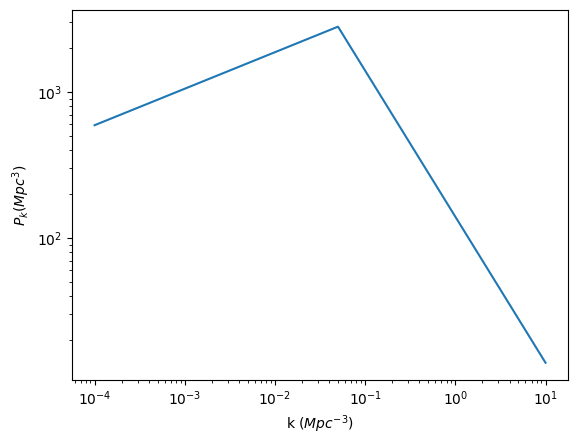

In [9]:
k = np.logspace(-4,1,1000)
Pk = ps.density_fluctuation(k)


plt.loglog(k,Pk)
plt.xlabel(r"k ($Mpc^{-3}$)")
plt.ylabel(r"$P_k (Mpc^3)$")


In [10]:
importlib.reload(ps)
importlib.reload(red)

k = [1e-4,1e-3,1e-2,1e-1,1]

delta_c0 = ps.density_fluctuation(k)*0.83
delta_b0 = ps.density_fluctuation(k)*0.17
delta_c_p0 = 0
delta_b_p0 = 0

delta_c = []
delta_b = []


for i in range(len(k)) : 

    right = (T >= 0)
    left = (T <= 0)

    delta_c_new_right, delta_b_new_right = red.couple_diff(DT, cold_DM, baryonic, delta_c0[i], delta_b0[i], delta_c_p0, delta_b_p0, 0, 30, a[right][1:], H[right][1:],rho_c[right][1:], omega_m[right][1:])
    delta_c_new_left, delta_b_new_left = red.couple_diff(-DT, cold_DM, baryonic, delta_c0[i], delta_b0[i], delta_c_p0, delta_b_p0, 0, -13.5, a[left][-1::-1], H[left][-1::-1],rho_c[left][-1::-1], omega_m[left][-1::-1])

    delta_c_new = np.concatenate([delta_c_new_left[-2::-1], delta_c_new_right[1:]],)
    delta_b_new = np.concatenate([delta_b_new_left[-2::-1], delta_b_new_right[1:]],)
    
    delta_c.append(delta_c_new)
    delta_b.append(delta_b_new)



C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_11460\3108405078.py:25: RuntimeWarning: overflow encountered in scalar multiply
  return -2*H*deltab_p - cs**2*deltab*a**-2 + 4*np.pi*G*rho_m_average*(deltab+ deltac)
C:\Users\Xavier Corap\AppData\Local\Temp\ipykernel_11460\3108405078.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  return -2*H*deltab_p - cs**2*deltab*a**-2 + 4*np.pi*G*rho_m_average*(deltab+ deltac)


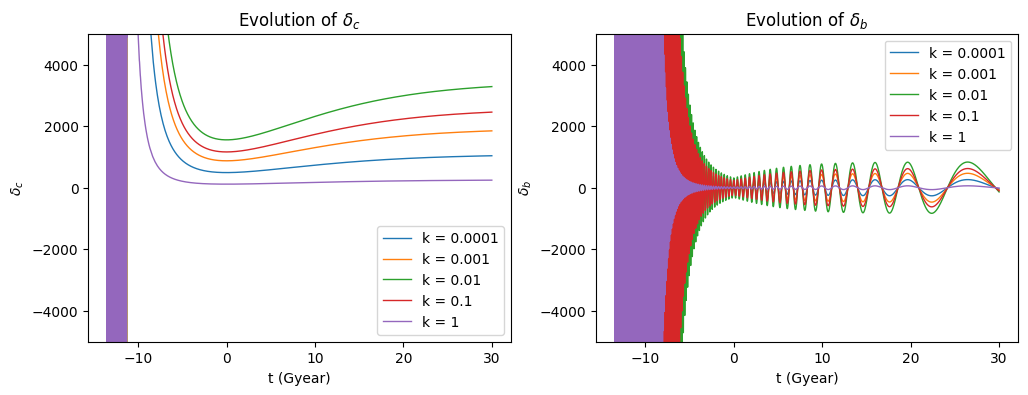

In [11]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

for i in range(len(k)):

    ax[0].plot(T, delta_c[i], label = f"k = {k[i]}", linewidth = 1)
    ax[1].plot(T, delta_b[i], label = f"k = {k[i]}", linewidth = 1)

    ax[0].set_title(r"Evolution of $\delta_c$")
    ax[0].set_ylabel(r"$\delta_c$")
    ax[0].set_xlabel("t (Gyear)")
    ax[0].set_ylim(-5000,5000)
    ax[0].legend()
    ax[1].set_title(r"Evolution of $\delta_b$")
    ax[1].set_ylabel(r"$\delta_b$")
    ax[1].set_xlabel("t (Gyear)")
    ax[1].legend()
    ax[1].set_ylim(-5000,5000)

